<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#广播机制" data-toc-modified-id="广播机制-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>广播机制</a></span><ul class="toc-item"><li><span><a href="#什么是广播" data-toc-modified-id="什么是广播-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>什么是广播</a></span></li><li><span><a href="#数组拉伸" data-toc-modified-id="数组拉伸-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数组拉伸</a></span></li></ul></li><li><span><a href="#函数的向量化" data-toc-modified-id="函数的向量化-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>函数的向量化</a></span><ul class="toc-item"><li><span><a href="#frompyfunc-函数" data-toc-modified-id="frompyfunc-函数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>frompyfunc 函数</a></span></li><li><span><a href="#vectorize-函数" data-toc-modified-id="vectorize-函数-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>vectorize 函数</a></span></li></ul></li><li><span><a href="#练习题" data-toc-modified-id="练习题-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>练习题</a></span></li></ul></div>

In [2]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

```
   
    
     
```

## 广播机制

### 什么是广播

我们都知道，Numpy中的基本运算（加、减、乘、除、求余等等）都是元素级别的，但是这仅仅局限于两个数组的形状相同的情况下。

可是大家又会发现，如果让一个数组加1的话，结果时整个数组的结果都会加1，这是什么情况呢？

In [3]:
np.random.seed(0)
x = np.array(range(12)).reshape(3, 4)

x
x + 1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [4]:
x_01=np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11]])

x_02 = np.array([1, 2, 3, 4])


x_01+x_02

array([[ 1,  3,  5,  7],
       [ 5,  7,  9, 11],
       [ 9, 11, 13, 15]])

其实这就是广播机制：Numpy 可以转换这些形状不同的数组，使它们都具有相同的大小，然后再对它们进行运算。  
```
    
   
```
**广播规则有三：**

```
```
**规则1：如果两个数组的维度数不相同，那么小维度数组的形状将会补齐**

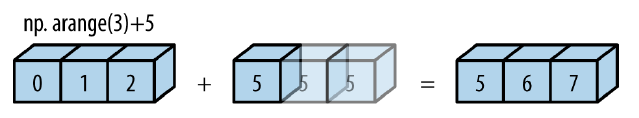

In [5]:
np.arange(3)+5

array([5, 6, 7])

如果两个数组形状中，只有其中一个维度相同，另一个维度不一致，但是其中一个数组有维度为1，则依然可以补齐：

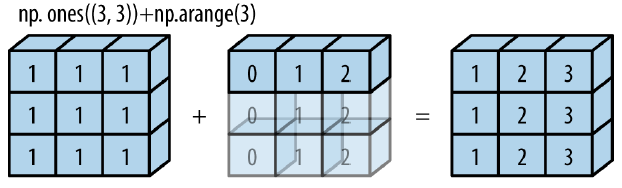

In [6]:
np.ones((3,3))+np.arange(3)

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [6]:
np.ones((3,3))+np.ones((1,3))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [7]:
np.ones((3,3))+np.ones((3,1))

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

```


```
**规则2：如果两个数组的形状在任何一个维度都不匹配，但两个数组都有其中以维度为1，则数组的形状会沿着维度为1的维度扩展，以匹配另外一个数组形状。**

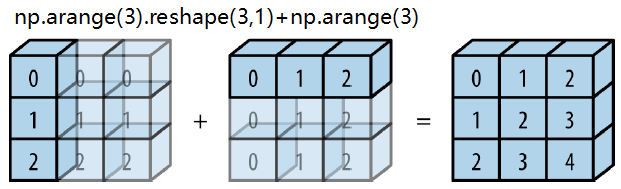

In [7]:
np.arange(3).reshape(3,1)+np.arange(3)

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [9]:
np.ones((1,3))+np.ones((2,1))

array([[2., 2., 2.],
       [2., 2., 2.]])

```


```
**规则3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于1，会广播错误。**

In [10]:
np.ones((3,3))+np.ones((2,3))

ValueError: operands could not be broadcast together with shapes (3,3) (2,3) 

```
   
    
     
```

### 数组拉伸

现在尝试模拟一个广播的方式, 把a中的每个元素拉长三倍

In [3]:
import numpy as np
a=np.array([[0],
            [10],
            [20],
            [30]])

a.tolist()  #将数组作为（可能是嵌套的）列表返回。

[[0], [10], [20], [30]]

In [8]:
list(a)

[array([0]), array([10]), array([20]), array([30])]

In [14]:
[i*3 for i in [[0], [10], [20], [30]]]

[[0, 0, 0], [10, 10, 10], [20, 20, 20], [30, 30, 30]]

In [6]:
a2 = np.array([ i * 3 for i in a.tolist()]) # 会先将a转为a2

a2

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

把b中的元素纵向拉长三倍

In [17]:
b=np.array([0, 1, 2])
b.tolist()

[0, 1, 2]

In [18]:
[[0, 1, 2]]*4

[[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]

In [19]:
b2 = np.array([b.tolist()] * 4)
b2

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

```
   
    
     
```

## 函数的向量化

想要实现将python函数向量化，Numpy中的vectorize 和frompyfunc函数都可以满足要求。


### frompyfunc 函数
frompyfunc（func，nin，nout）

- 采用任意Python函数并返回NumPy ufunc。
- 例如，可以用于向内置Python添加广播功能。
- 参数
    - func：Python函数对象，任意Python函数。
    - nin：int，输入参数的数量。
    - nout：int，'func'返回的对象数。（NumPy通用函数（``ufunc``）对象。）

In [1]:
def fun(x,y):
    if x>y:
        return 1
    else:
        return 2  

a=np.array([1,12,5,6,7,9])
b=np.array([5,6,7,8,9,12])
a
b

fun_array = np.frompyfunc(fun,2,1,)  

fun_array(a,b)

array([ 1, 12,  5,  6,  7,  9])

array([ 5,  6,  7,  8,  9, 12])

(array([2, 1, 2, 2, 2, 2], dtype=object),
 array([22, 11, 22, 22, 22, 22], dtype=object))

In [2]:
def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return 0
    else:
        return 1

vfunc = np.frompyfunc(myfunc,2,1)
vfunc([1, 2, 3, 4], 2)  #广播机制，位置参数a指向[1, 2, 3, 4]，b指向2

array([1, 1, 0, 0], dtype=object)

上面的数组都默认返回object数据类型，有没有办法可以使用指定的数据类型？

```

   
    
   
   
```
### vectorize 函数

np.vectorize(['pyfunc'，'otypes = None'）
- 定义一个矢量化函数，它接受一组嵌套的对象或numpy数组作为输入并返回单个numpy数组或元组输出。
    - pyfunc：可调用python函数或方法。
    - otypes：str或dtypes列表，可选输出数据类型。必须将其指定为字符串typecode字符或数据类型说明符列表。应该是每个输出的一个数据类型说明符。

In [21]:
def fun(x,y):
    if x>y:
        return 1
    else:
        return 2

a=np.array([1,12,5,6,7,9])
b=np.array([5,6,7,8,9,12])
a
b

fun_array = np.vectorize(fun,otypes=[float])       #这里只是将上一节的np.frompyfunc改成np.vectorize

fun_array(a,b)

array([ 1, 12,  5,  6,  7,  9])

array([ 5,  6,  7,  8,  9, 12])

array([2., 1., 2., 2., 2., 2.])

需要注意的是，vectorize函数主要作用是提供便利，而不是性能。它的实现本质上是for循环。


```

   
    
   
   
```
## 练习题
假设有三个数组，分别记录10位同学的语文、数学、英语三门课程的分数:
```
chinese=np.array([99, 55, 58, 58, 94, 64, 74, 76, 91, 78])
math=np.array([61, 79, 79, 67, 56, 93, 94, 78, 79, 72])
english=np.array([92, 80, 68, 63, 64, 75, 71, 60, 70, 55])
``` 
要求生成一个数组：
- 如果语文成绩最大，返回1；
- 如果数学成绩最大，返回2；
- 如果英语成绩最大，返回3；  
最终生成的数组为：np.array([1, 3, 2, 2, 1, 2, 2, 2, 1, 1])

In [5]:
def subject(x,y,z):
    if (x>y) and (x>z):
        return 1
    elif (y>x) and (y>z):
        return 2
    else:
        return 3

a=np.array([99, 55, 58, 58, 94, 64, 74, 76, 91, 78])
b=np.array([61, 79, 79, 67, 56, 93, 94, 78, 79, 72])
c=np.array([92, 80, 68, 63, 64, 75, 71, 60, 70, 55])
a
b
c

subject_array = np.vectorize(subject)     
subject_array(a,b,c)

array([99, 55, 58, 58, 94, 64, 74, 76, 91, 78])

array([61, 79, 79, 67, 56, 93, 94, 78, 79, 72])

array([92, 80, 68, 63, 64, 75, 71, 60, 70, 55])

array([1, 3, 2, 2, 1, 2, 2, 2, 1, 1])